# Engenius '20 - EDA

## Summary

The Main goal is to predict the quantities sold of a set of products within a 4 months time frame.

# Table Of Contents

# Exploratory Data Analysis

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dfA = pd.read_excel(r"C:\Users\bagoyem\Desktop\Eczacıbaşı\pharma_sales_201719.xlsx", sheet_name = "PRODUCT_A")
dfB = pd.read_excel(r"C:\Users\bagoyem\Desktop\Eczacıbaşı\pharma_sales_201719.xlsx", sheet_name = "PRODUCT_B")    
dfC = pd.read_excel(r"C:\Users\bagoyem\Desktop\Eczacıbaşı\pharma_sales_201719.xlsx", sheet_name = "PRODUCT_C")
dfV = pd.read_excel(r"C:\Users\bagoyem\Desktop\Eczacıbaşı\pharma_sales_201719.xlsx", sheet_name = "PRODUCT_V")
dfX = pd.read_excel(r"C:\Users\bagoyem\Desktop\Eczacıbaşı\pharma_sales_201719.xlsx", sheet_name = "PRODUCT_X")

In [11]:
df = pd.concat([dfA, dfB, dfC, dfV, dfX], axis = 0, ignore_index =True) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58032 entries, 0 to 58031
Data columns (total 5 columns):
Year        58032 non-null int64
Period      58032 non-null int64
Product     58032 non-null object
Province    58032 non-null object
Quantity    58032 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.2+ MB


In [13]:
df.head()

,Year,Period,Product,Province,Quantity
0,2017,201701,PRODUCT_A,ANKARA,16
1,2017,201701,PRODUCT_A,ANKARA,25
2,2017,201701,PRODUCT_A,ANKARA,56
3,2017,201701,PRODUCT_A,ANKARA,16
4,2017,201701,PRODUCT_A,ADANA,11


In [14]:
df.tail()

,Year,Period,Product,Province,Quantity
58027,2019,201912,PRODUCT_X,ŞANLIURFA,317
58028,2019,201912,PRODUCT_X,TRABZON,171
58029,2019,201912,PRODUCT_X,TUNCELİ,16
58030,2019,201912,PRODUCT_X,VAN,301
58031,2019,201912,PRODUCT_X,YALOVA,77


In [15]:
df.isnull().sum()

Year        0
Period      0
Product     0
Province    0
Quantity    0
dtype: int64

In [16]:
np.sort(df["Province"].unique())

array(['ADANA', 'ADIYAMAN', 'AFYON', 'AKSARAY', 'AMASYA', 'ANKARA',
       'ANTALYA', 'ARDAHAN', 'ARTVİN', 'AYDIN', 'AĞRI', 'BALIKESİR',
       'BARTIN', 'BATMAN', 'BAYBURT', 'BINGOL', 'BITLIS', 'BOLU',
       'BURDUR', 'BURSA', 'BİLECİK', 'DENİZLİ', 'DÜZCE', 'DİYARBAKIR',
       'EDİRNE', 'ELAZIĞ', 'ERZURUM', 'ERZİNCAN', 'ESKİŞEHİR',
       'GAZİANTEP', 'GÜMÜŞHANE', 'GİRESUN', 'HAKKARİ', 'HATAY', 'ISPARTA',
       'ISTANBUL', 'IĞDIR', 'KAHRAMANMARAŞ', 'KARABÜK', 'KARAMAN', 'KARS',
       'KASTAMONU', 'KAYSERİ', 'KIRIKKALE', 'KIRKLARELİ', 'KIRŞEHİR',
       'KOCAELİ', 'KONYA', 'KÜTAHYA', 'KİLİS', 'MALATYA', 'MANİSA',
       'MARDIN', 'MUĞLA', 'MUŞ', 'NEVŞEHİR', 'NİĞDE', 'ORDU', 'OSMANİYE',
       'RİZE', 'SAKARYA', 'SAMSUN', 'SİNOP', 'SİVAS', 'SİİRT', 'TEKİRDAĞ',
       'TOKAT', 'TRABZON', 'TUNCELİ', 'UŞAK', 'VAN', 'YALOVA', 'YOZGAT',
       'ZONGULDAK', 'ÇANAKKKALE', 'ÇANKIRI', 'ÇORUM', 'İSTANBUL', 'İZMİR',
       'İÇEL', 'ŞANLIURFA', 'ŞIRNAK'], dtype=object)

In [17]:
m = {}
for mistake in df['Province']:
    if (mistake == 'ISTANBUL'):
        m.setdefault(mistake,'İSTANBUL')
    else:
        m.setdefault(mistake, mistake)
        
df['Province'] = df['Province'].map(m)

In [18]:
np.sort(df["Province"].unique())

array(['ADANA', 'ADIYAMAN', 'AFYON', 'AKSARAY', 'AMASYA', 'ANKARA',
       'ANTALYA', 'ARDAHAN', 'ARTVİN', 'AYDIN', 'AĞRI', 'BALIKESİR',
       'BARTIN', 'BATMAN', 'BAYBURT', 'BINGOL', 'BITLIS', 'BOLU',
       'BURDUR', 'BURSA', 'BİLECİK', 'DENİZLİ', 'DÜZCE', 'DİYARBAKIR',
       'EDİRNE', 'ELAZIĞ', 'ERZURUM', 'ERZİNCAN', 'ESKİŞEHİR',
       'GAZİANTEP', 'GÜMÜŞHANE', 'GİRESUN', 'HAKKARİ', 'HATAY', 'ISPARTA',
       'IĞDIR', 'KAHRAMANMARAŞ', 'KARABÜK', 'KARAMAN', 'KARS',
       'KASTAMONU', 'KAYSERİ', 'KIRIKKALE', 'KIRKLARELİ', 'KIRŞEHİR',
       'KOCAELİ', 'KONYA', 'KÜTAHYA', 'KİLİS', 'MALATYA', 'MANİSA',
       'MARDIN', 'MUĞLA', 'MUŞ', 'NEVŞEHİR', 'NİĞDE', 'ORDU', 'OSMANİYE',
       'RİZE', 'SAKARYA', 'SAMSUN', 'SİNOP', 'SİVAS', 'SİİRT', 'TEKİRDAĞ',
       'TOKAT', 'TRABZON', 'TUNCELİ', 'UŞAK', 'VAN', 'YALOVA', 'YOZGAT',
       'ZONGULDAK', 'ÇANAKKKALE', 'ÇANKIRI', 'ÇORUM', 'İSTANBUL', 'İZMİR',
       'İÇEL', 'ŞANLIURFA', 'ŞIRNAK'], dtype=object)

In [20]:
df = df.groupby(by = ['Year', 'Period', 'Product', 'Province'])['Quantity'].sum().reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13343 entries, 0 to 13342
Data columns (total 5 columns):
Year        13343 non-null int64
Period      13343 non-null int64
Product     13343 non-null object
Province    13343 non-null object
Quantity    13343 non-null int64
dtypes: int64(3), object(2)
memory usage: 521.3+ KB


In [23]:
df.head()

,Year,Period,Product,Province,Quantity
0,2017,201701,PRODUCT_A,ADANA,346
1,2017,201701,PRODUCT_A,ADIYAMAN,36
2,2017,201701,PRODUCT_A,AFYON,66
3,2017,201701,PRODUCT_A,AKSARAY,36
4,2017,201701,PRODUCT_A,AMASYA,34


In [24]:
df.tail()

,Year,Period,Product,Province,Quantity
13338,2019,201912,PRODUCT_X,İSTANBUL,3933
13339,2019,201912,PRODUCT_X,İZMİR,1140
13340,2019,201912,PRODUCT_X,İÇEL,265
13341,2019,201912,PRODUCT_X,ŞANLIURFA,317
13342,2019,201912,PRODUCT_X,ŞIRNAK,27


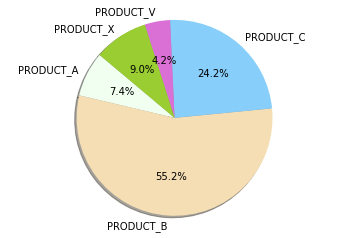

Product
PRODUCT_A     576747
PRODUCT_B    4291439
PRODUCT_C    1879572
PRODUCT_V     324499
PRODUCT_X     696845
Name: Quantity, dtype: int64

In [41]:
labels = df.Product.unique()
sizes = df.groupby(by = ["Product"])["Quantity"].sum().sort_index().tolist()
colors = ['honeydew', 'wheat', 'lightskyblue', 'orchid', 'yellowgreen']
#explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, labels = labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

df.groupby(["Product"])["Quantity"].sum()